## Importing Required libraries

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense,Flatten,AveragePooling2D,Conv2D,BatchNormalization,Dropout,MaxPool2D
import numpy as np
import cv2
import matplotlib.pyplot as plt
import splitfolders as sf
import os

In [47]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Checking for GPU enable status and allowing it to allocate memory

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Preprocessing
#### 1. Dividing the dataset images in train and test
#### 2. Normalizing the images and selecting batch size and defining class
#### 3. Data augmentation and refining and setting target Image size

In [4]:
# sf.ratio(input="D:\\Datasets IC\\Garbage classification",output='D:\\Datasets IC\\nn',ratio=(0.75,0.25),group_prefix=None)

In [5]:
# tr=keras.utils.image_dataset_from_directory(
#     directory="D:\\Datasets IC\\nn\\train",
#     labels='inferred',
#     batch_size=32,
#     color_mode='rgb',
#     label_mode='int',
#     image_size=(256,256)
# )
# te=keras.utils.image_dataset_from_directory(
#     directory="D:\\Datasets IC\\nn\\val",
#     labels='inferred',
#     batch_size=32,
#     color_mode='rgb',
#     label_mode='int',
#     image_size=(256,256),
# )

In [4]:
tr=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.0
    )

te=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
#      validation_split=0.0
)

tr=tr.flow_from_directory(
    directory="D:\\Datasets IC\\litter_op\\train",
    target_size=(227,227),
    batch_size=8,
    class_mode='sparse',
    subset='training',
    seed=22
)

te=te.flow_from_directory(
    directory="D:\\Datasets IC\\litter_op\\val",
    target_size=(227,227),
    batch_size=8,
    class_mode='sparse',
    subset='training',
    seed=23
)

Found 5317 images belonging to 6 classes.
Found 1774 images belonging to 6 classes.


In [5]:
# import tqdm
# tr.reset()
# xtr, ytr = next(tr)
# for i in tqdm.tqdm(range(int(tr.n/16)-1)): 
#     img, label = next(tr)
#     xtr = np.append(xtr, img, axis=0 )
#     ytr = np.append(ytr, label, axis=0)
# print(xtr.shape, ytr.shape) 
##generated and saved

In [8]:
# np.save('imgdata',xtr)

In [9]:
# np.save('imgvalue',ytr)

# General Model
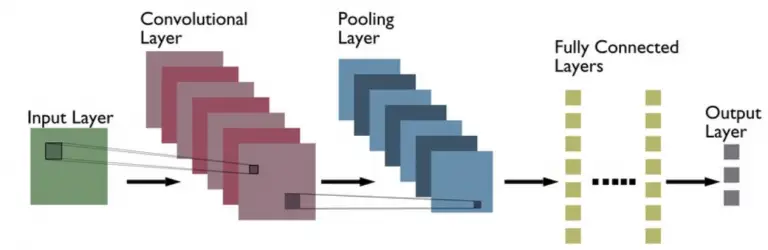

## Custom Model
#### The below model is an extension of LeNet with extra conv_layers and filters equivalent of AlexNet but with Average Pooling

In [18]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_6 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 average_pooling2d (AverageP  (None, 126, 126, 32)     0         
 ooling2D)                                                       
                                                      

## Inferences
#### 1. The LeNet Model by Yan Lecun in 1988 was a small model with good results but due to lack of convolution layer and less filters it extracts lot less features. So, increasing the filters and conv layer increases the possibilities of extraction of lot of distinct features. 
#### 2. Also, the average pooling was not a very good idea and the model lacked pixel normalization casuing an increase in training time

## AlexNet Architecture
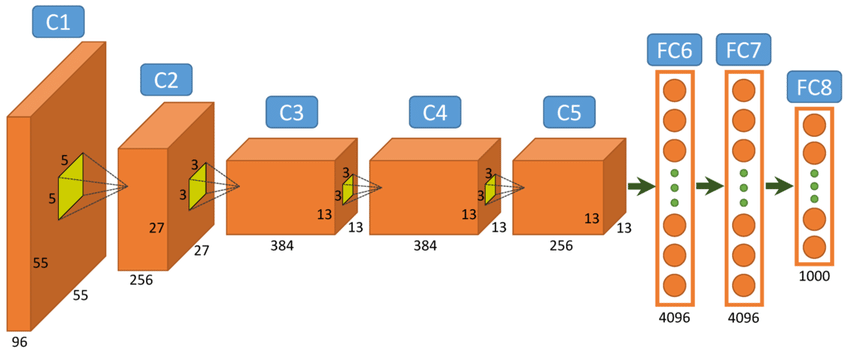

In [11]:
#alexnet
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

## Inferences
#### 1. The alexnet arch was one of the major model when it widened the gap of accuracy from 70%-74 % to 84%-86% winning ILSVRC in 2012.
#### 2. The model was trained using a GPU and Data hungry.
#### 3. Training Accyracy : 81% and Validation accuracy :  67%
##### (Yet had a high validation loss)

## VGG16 Architecture
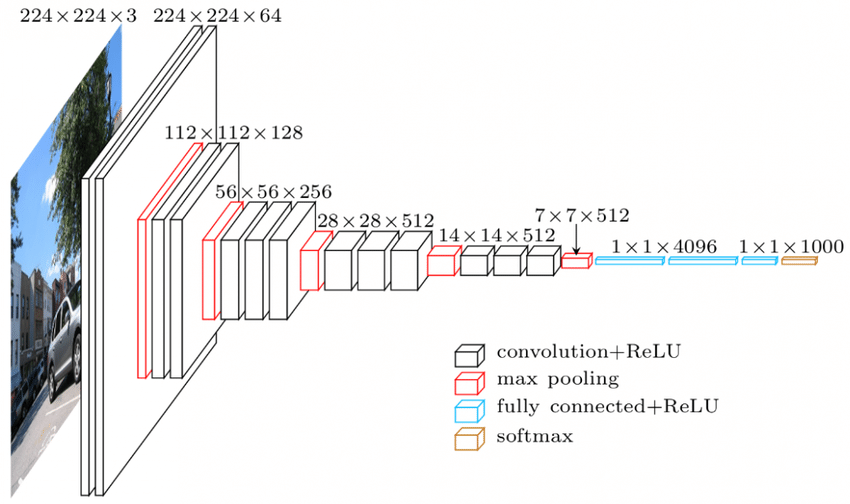

In [ ]:
# # ##vgg16

# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Flatten())

# model.add(Dense(4096,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(4096,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(1000,activation='relu'))
# model.add(Dropout(0.4))
# # model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

## Inferences 
#### 1. VGG16 gave 90% accuracy and was trained on 1.4 million dataset of imagent of 1000 distinct categories.
#### 2. It's by far the best Sequential model with in terms of accuracy and data hunger.
#### 3. Training Accuracy : 68% Validation accuracy : 70%

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,min_lr=1e-9,cooldown=5)
es=EarlyStopping(monitor='val_loss',patience=12)


In [15]:
mc=ModelCheckpoint(filepath="D:\\Datasets IC\\selfcnn.h5",save_best_only=True,monitor='val_loss',save_freq='epoch',mode='min',save_weights_only=False)

In [17]:
det=model.fit(tr,epochs=100,verbose=1,validation_data=te,callbacks=[lr,es,mc])

Epoch 1/100
665/665 [==============================] - 195s 280ms/step - loss: 3.2334 - accuracy: 0.2370 - val_loss: 1.8068 - val_accuracy: 0.2097 - lr: 0.0010
Epoch 2/100
665/665 [==============================] - 52s 77ms/step - loss: 1.7565 - accuracy: 0.2755 - val_loss: 1.8655 - val_accuracy: 0.2514 - lr: 0.0010
Epoch 3/100
665/665 [==============================] - 48s 72ms/step - loss: 1.7574 - accuracy: 0.2468 - val_loss: 1.7590 - val_accuracy: 0.2052 - lr: 0.0010
Epoch 4/100
665/665 [==============================] - 44s 65ms/step - loss: 1.7655 - accuracy: 0.2447 - val_loss: 1.7130 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 5/100
665/665 [==============================] - 39s 58ms/step - loss: 1.8165 - accuracy: 0.1693 - val_loss: 1.7934 - val_accuracy: 0.1685 - lr: 0.0010
Epoch 6/100
665/665 [==============================] - 39s 59ms/step - loss: 1.8101 - accuracy: 0.1676 - val_loss: 1.7920 - val_accuracy: 0.1685 - lr: 0.0010
Epoch 7/100
665/665 [=============================

In [ ]:
model.evaluate(te)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(det.history['val_loss'])

In [48]:
# model.save("D:\\Datasets IC\\newmod1.h5")

NameError: name 'model' is not defined

In [ ]:
# type(sav)

In [9]:
cat={0 : "Cardboard", 1:"Glass", 2:"Metal", 3: "Paper", 4:"Plastic", 5 : "Trash"}

In [6]:
m1=load_model(r"D:/Models/Normalized_Inception_Base_Best_weights.h5")

In [7]:
import numpy as np
import cv2

1/1 [==============================] - 0s 34ms/step
[[0. 0. 0. 0. 0. 1.]]


'Trash'

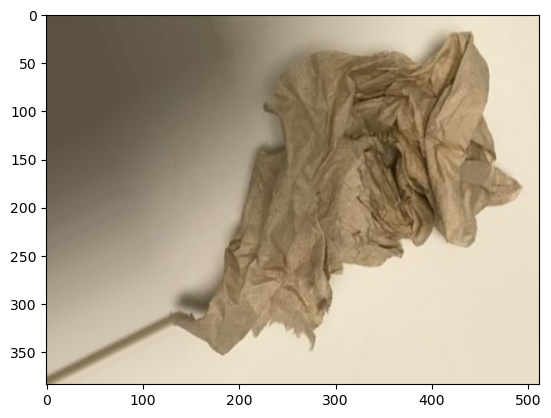

In [10]:
img=cv2.imread(r"D:\Datasets IC\litter_op\train\trash\trash0_2_6553.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img=cv2.resize(img,(227,227))
img=[img]
imar=np.array(img)
k=m1.predict(imar)
print(k)
k=np.argmax(k)
cat[k]

1/1 [==============================] - 0s 28ms/step
[[0. 0. 1. 0. 0. 0.]]


'Metal'

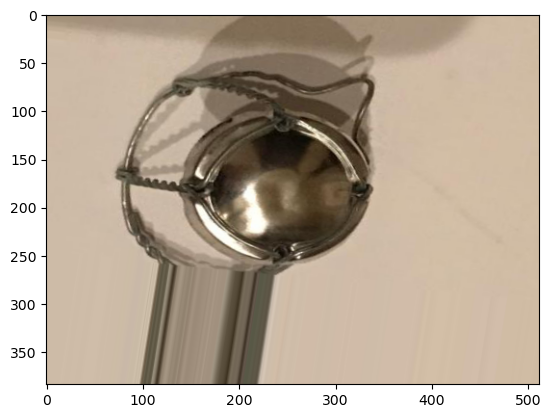

In [11]:
img=cv2.imread(r"D:\Datasets IC\litter_op\train\metal\metal0_6_9986.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img=cv2.resize(img,(227,227))
img=[img]
imar=np.array(img)
k=m1.predict(imar)
print(k)
k=np.argmax(k)
cat[k]

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 0. 0. 1.]]


'Trash'

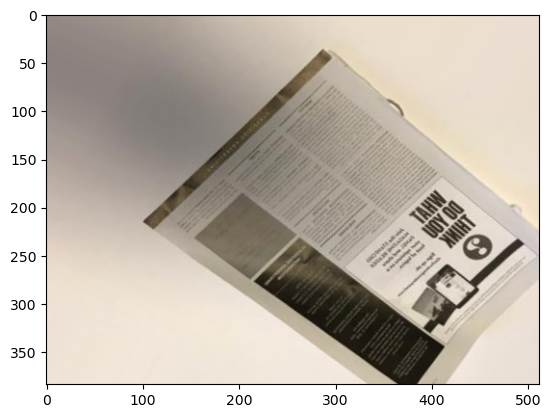

In [12]:
img=cv2.imread(r"D:\Datasets IC\litter_op\train\paper\paper0_0_4505.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img=cv2.resize(img,(227,227))
img=[img]
imar=np.array(img)
k=m1.predict(imar)
print(k)
k=np.argmax(k)
cat[k]
## was supposed to be paper